In [2]:
import pandas as pd
import numpy as np
from time import time
import re
from tqdm import tqdm
from sklearn.metrics import jaccard_score
import missingno as msno
from google.cloud import bigquery

In [3]:
bqclient = bigquery.Client(project='charged-genre-350106')

In [4]:
query_rentcar= """
SELECT
  product_name,
  car_type
FROM 
  `charged-genre-350106.bcml.bcml_rentcar`
"""

In [5]:
car_type = bqclient.query(query_rentcar).to_dataframe()

In [6]:
car_type


,product_name,car_type
0,카니발 4세대 9인(휘),06
1,팰리세이드 8인 (21년~)(휘),05
2,지프 레니게이드(휘),05
3,SM6(22년~)(LPG),03
4,그랜저 IG(LPG),04
...,...,...
1046161,더 올 뉴 투싼(20년~)(경),05
1046162,더 올 뉴 투싼(20년~)(경),05
1046163,더 올 뉴 투싼(20년~)(경),05
1046164,더 올 뉴 투싼(20년~)(경),05


In [7]:
car_type=car_type.dropna(axis=0)

In [8]:
car_type

,product_name,car_type
0,카니발 4세대 9인(휘),06
1,팰리세이드 8인 (21년~)(휘),05
2,지프 레니게이드(휘),05
3,SM6(22년~)(LPG),03
4,그랜저 IG(LPG),04
...,...,...
1046161,더 올 뉴 투싼(20년~)(경),05
1046162,더 올 뉴 투싼(20년~)(경),05
1046163,더 올 뉴 투싼(20년~)(경),05
1046164,더 올 뉴 투싼(20년~)(경),05


<AxesSubplot:>

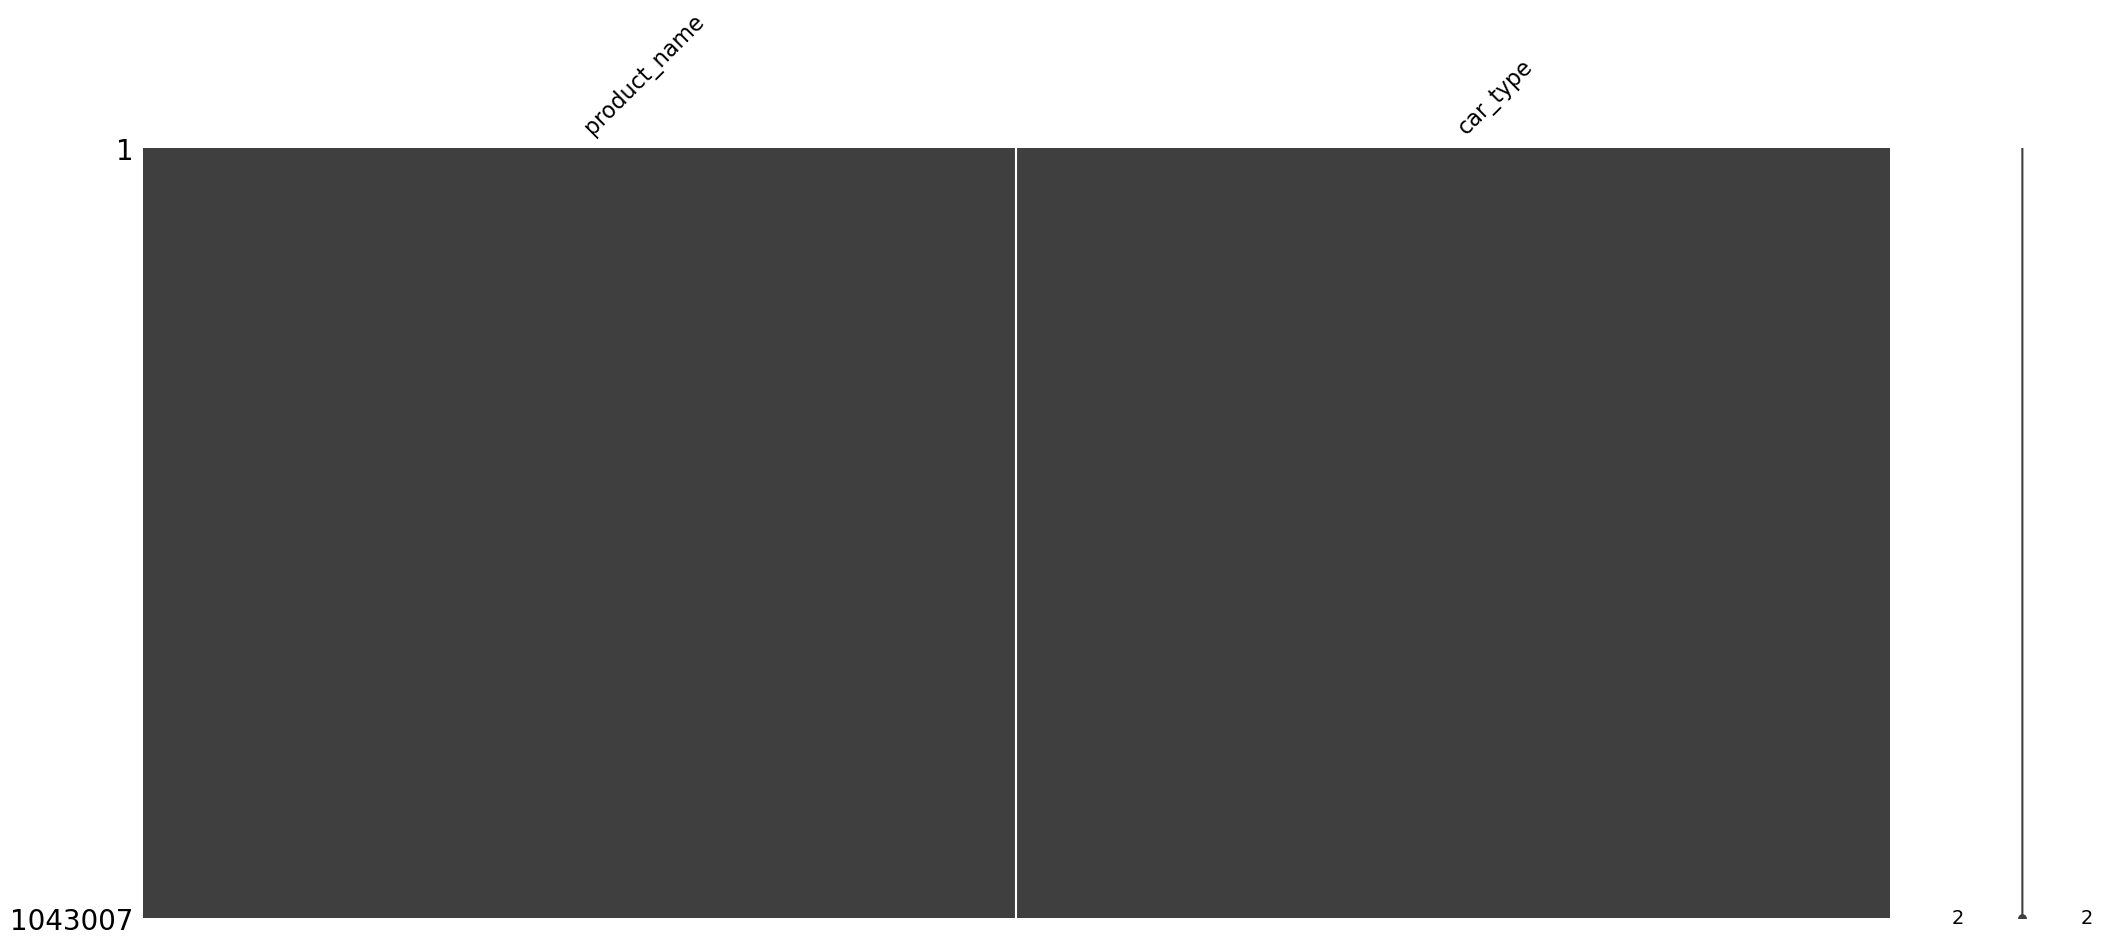

In [9]:
msno.matrix(car_type)

In [10]:
car_type=car_type.drop_duplicates(['product_name'])

In [11]:
car_type=car_type.reset_index()

In [12]:
car_type

,index,product_name,car_type
0,0,카니발 4세대 9인(휘),06
1,1,팰리세이드 8인 (21년~)(휘),05
2,2,지프 레니게이드(휘),05
3,3,SM6(22년~)(LPG),03
4,4,그랜저 IG(LPG),04
...,...,...,...
386,160662,제네시스 EQ900(휘),04
387,170204,코란도 투리스모 9인(경),06
388,173128,더 뉴 트랙스(휘),05
389,178482,YF 쏘나타(LPG),03


In [13]:
for i in tqdm(range(len(car_type))):
    car_type['product_name'][i]=re.sub('\(.*\)|\s-\s.*','',car_type['product_name'][i])

  0%|          | 0/391 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 391/391 [00:00<00:00, 3091.13it/s]


In [14]:
car_type=car_type[['product_name','car_type']]

In [15]:
car_type

,product_name,car_type
0,카니발 4세대 9인,06
1,팰리세이드 8인,05
2,지프 레니게이드,05
3,SM6,03
4,그랜저 IG,04
...,...,...
386,제네시스 EQ900,04
387,코란도 투리스모 9인,06
388,더 뉴 트랙스,05
389,YF 쏘나타,03


In [16]:
car_group=car_type.groupby('car_type')['product_name'].apply(','.join).to_frame().reset_index()

In [17]:
car_group

,car_type,product_name
0,01,"캐스퍼 인스퍼레이션,더 뉴 스파크,올 뉴 모닝,캐스퍼,더 넥스트 스파크,더 뉴 레이..."
1,02,"엑센트,볼트 EV,미니 쿠퍼 컨버터블,엑센트,CLIO,미니 쿠퍼 컨버터블S,엑센트,..."
2,03,"SM6,더 뉴 말리부,쏘나타 뉴 라이즈,벤츠 E220D 카브리올레,테슬라모델3,LF..."
3,04,"그랜저 IG,포드 머스탱 컨버터블,더 뉴 그랜저IG,지프 랭글러 루비콘 ,제네시스 ..."
4,05,"팰리세이드 8인 ,지프 레니게이드,쏘렌토 4세대 7인,더 뉴 쏘렌토 7인,쏘렌토 4..."
5,06,"카니발 4세대 9인,더 뉴 카니발 11인,카니발 4세대 9인,스타리아 9인,올 뉴 ..."
6,07,"SM3,올 뉴 아반떼CN7,토요타 프리우스,미니 쿠퍼 컨버터블,SM3 ZE,K3,미..."
7,08,"올 뉴 니로 EV,BMW I4,코란도 이모션"
8,09,"미니 쿠퍼 컨버터블JCW,미니 쿠퍼 컨버터블,미니 쿠퍼 컨트리맨 ,BMW 420i ..."


In [18]:
query_erp= """
SELECT
  model_name
FROM 
  `charged-genre-350106.bcml.bcml_erp`
"""

In [19]:
model_erp = bqclient.query(query_erp).to_dataframe()

In [20]:
model_erp=model_erp.drop_duplicates(['model_name'])

In [21]:
model_erp=model_erp.reset_index()
model_erp

,index,model_name
0,0,K3
1,197,K5
2,205,k3
3,206,CT5
4,207,NK3
...,...,...
1190,917750,쏘나타 뉴 라이즈 L 2018 │ 24호2412
1191,917754,쏘렌토 더 마스터 D 2019 │105허1117
1192,917755,아반떼 AD 스포츠 G 2018 │ 147호1005
1193,918339,2020 The K9 3800 플래티넘 II AT 휘발유 2020


In [22]:
(car_group.iloc[0].to_dict()['product_name']).split(',')

['캐스퍼 인스퍼레이션',
 '더 뉴 스파크',
 '올 뉴 모닝',
 '캐스퍼',
 '더 넥스트 스파크',
 '더 뉴 레이',
 '레이',
 '더 뉴 모닝',
 '더 뉴 모닝',
 '모닝',
 '모닝 어반',
 '올 뉴 모닝',
 '올 뉴 모닝',
 '더 뉴 레이',
 '더 뉴 레이',
 '더 뉴 스파크',
 '모닝 어반',
 '차박 캠핑 레이',
 '스파크']

In [23]:
car_dic=car_group.iloc[0].to_dict()

In [24]:
car_dic

{'car_type': '01',
 'product_name': '캐스퍼 인스퍼레이션,더 뉴 스파크,올 뉴 모닝,캐스퍼,더 넥스트 스파크,더 뉴 레이,레이,더 뉴 모닝,더 뉴 모닝,모닝,모닝 어반,올 뉴 모닝,올 뉴 모닝,더 뉴 레이,더 뉴 레이,더 뉴 스파크,모닝 어반,차박 캠핑 레이,스파크'}

In [25]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [26]:
list((model_erp.iloc[0].to_dict()['model_name']).lower())#.split(',')

['k', '3']

In [27]:
model_erp['car_type']='00'

In [28]:
model_erp

,index,model_name,car_type
0,0,K3,00
1,197,K5,00
2,205,k3,00
3,206,CT5,00
4,207,NK3,00
...,...,...,...
1190,917750,쏘나타 뉴 라이즈 L 2018 │ 24호2412,00
1191,917754,쏘렌토 더 마스터 D 2019 │105허1117,00
1192,917755,아반떼 AD 스포츠 G 2018 │ 147호1005,00
1193,918339,2020 The K9 3800 플래티넘 II AT 휘발유 2020,00


In [29]:
model_erp['model_name'].iloc[0]


'K3'

In [30]:
list((car_group.iloc[i].to_dict()['product_name']).lower())
list((car_group.iloc[i].to_dict()['product_name']).lower())
list((model_erp.iloc[0].to_dict()['model_name']).lower())

IndexError: single positional indexer is out-of-bounds

In [31]:
for i in range(len(car_group)):
    similarity=[]
    car_dic=car_group.iloc[i].to_dict()
    print((car_dic['product_name']))
    print((car_dic['car_type']))
    for j in range(len(model_erp)):
        erp_dic=model_erp.iloc[j].to_dict()
        print((erp_dic['model_name']))
        similarity.append(jaccard_similarity((list((car_dic['product_name']).lower().replace(" ", ""))),
                                             (list((erp_dic['model_name']).lower().replace(" ", "")))))
        
        #if jaccard_similarity((car_group.iloc[i].to_dict()['product_name']).lower().split(','),(model_erp.iloc[j].to_dict()['model_name']).lower().split(',')) != 0:
        #if jaccard_similarity(list((car_group.iloc[i].to_dict()['product_name']).lower()),list((model_erp.iloc[0].to_dict()['model_name']).lower())) != 0:
        #    model_erp['car_type'].iloc[i]=car_dic['car_type']
        print(similarity)
    print("--------------")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [262]:
for i in range(len(car_group)):
    car_dic=car_group.iloc[i].to_dict()
    for j in range(len(model_erp)):
        erp_dic=model_erp.iloc[i].to_dict()
        if jaccard_similarity((car_group.iloc[i].to_dict()['product_name']).lower().split(','),(model_erp.iloc[j].to_dict()['model_name']).lower().split(',')) != 0:
            model_erp['car_type'].iloc[j]=car_dic['car_type']


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [264]:
model_erp.head(50)

,index,model_name,car_type
0,0,K3,07
1,197,K5,03
2,205,k3,07
3,206,CT5,04
4,207,NK3,05
5,239,SM6,03
6,301,XT4,07
7,305,19K5,00
8,307,SM6LE,00
9,308,뉴K5,00
